# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-2,1e-4]
EPOCHS = 50

In [7]:
def set_optimizer(optimizer):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer)

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = set_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=False)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.010000 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 17ms/st

196/196 [==============================] - 3s 17ms/step - loss: 1.2279 - accuracy: 0.5686 - val_loss: 1.3968 - val_accuracy: 0.4997
Experiment with lr = 0.010000 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

196/196 [==============================] - 5s 24ms/step - loss: 1.7276 - accuracy: 0.3771 - val_loss: 1.8134 - val_accuracy: 0.3431
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7317 - accuracy: 0.3718 - val_loss: 1.7698 - val_accuracy: 0.3551
Experiment with lr = 0.010000 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.0217 - accuracy: 0.6462 - val_loss: 1.3423 - val_accuracy: 0.5274
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 1.0110 - accuracy: 0.6489 - val_loss: 1.3405 - val_accuracy: 0.5299
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 1.0035 - accuracy: 0.6556 - val_loss: 1.4201 - val_accuracy: 0.5097
Experiment with lr = 0.010000 , optimizer=Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.5170 - accuracy: 0.4550 - val_loss: 1.5987 - val_accuracy: 0.4265
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5206 - accuracy: 0.4535 - val_loss: 1.6091 - val_accuracy: 0.4321
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5287 - accuracy: 0.4514 - val_loss: 1.6080 - val_accuracy: 0.4292
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5128 - accuracy: 0.4542 - val_loss: 1.5956 - val_accuracy: 0.4319
Experiment with lr = 0.000100 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________

196/196 [==============================] - 3s 16ms/step - loss: 2.0458 - accuracy: 0.2936 - val_loss: 2.0430 - val_accuracy: 0.2976
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0424 - accuracy: 0.2954 - val_loss: 2.0396 - val_accuracy: 0.2990
Epoch 48/50
196/196 [==============================] - 3s 18ms/step - loss: 2.0390 - accuracy: 0.2968 - val_loss: 2.0362 - val_accuracy: 0.2997
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0357 - accuracy: 0.2980 - val_loss: 2.0329 - val_accuracy: 0.3006
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0325 - accuracy: 0.2994 - val_loss: 2.0297 - val_accuracy: 0.3023
Experiment with lr = 0.000100 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________

196/196 [==============================] - 6s 30ms/step - loss: 0.9805 - accuracy: 0.6629 - val_loss: 1.3882 - val_accuracy: 0.5252
Epoch 46/50
196/196 [==============================] - 6s 31ms/step - loss: 0.9704 - accuracy: 0.6663 - val_loss: 1.4215 - val_accuracy: 0.5107
Epoch 47/50
196/196 [==============================] - 6s 31ms/step - loss: 0.9625 - accuracy: 0.6678 - val_loss: 1.4721 - val_accuracy: 0.5110
Epoch 48/50
196/196 [==============================] - 6s 30ms/step - loss: 0.9525 - accuracy: 0.6721 - val_loss: 1.4770 - val_accuracy: 0.5045
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9414 - accuracy: 0.6771 - val_loss: 1.3608 - val_accuracy: 0.5311
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9308 - accuracy: 0.6819 - val_loss: 1.3916 - val_accuracy: 0.5258
Experiment with lr = 0.000100 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (typ

196/196 [==============================] - 3s 17ms/step - loss: 1.8885 - accuracy: 0.3450 - val_loss: 1.8888 - val_accuracy: 0.3446
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8855 - accuracy: 0.3461 - val_loss: 1.8859 - val_accuracy: 0.3458
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8826 - accuracy: 0.3473 - val_loss: 1.8831 - val_accuracy: 0.3465uracy
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8797 - accuracy: 0.3482 - val_loss: 1.8803 - val_accuracy: 0.3471
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8769 - accuracy: 0.3495 - val_loss: 1.8777 - val_accuracy: 0.3481
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8742 - accuracy: 0.3505 - val_loss: 1.8751 - val_accuracy: 0.3485
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8716 - accuracy: 0.3511 - val_loss: 1.8726 - val_accuracy: 0.3487

196/196 [==============================] - 3s 16ms/step - loss: 0.9067 - accuracy: 0.6890 - val_loss: 1.4055 - val_accuracy: 0.5218: 0.9053 - accura - ETA: 0s - loss: 0.9096 - accura
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8965 - accuracy: 0.6926 - val_loss: 1.4002 - val_accuracy: 0.5256
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8871 - accuracy: 0.6968 - val_loss: 1.4028 - val_accuracy: 0.5253
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8785 - accuracy: 0.6994 - val_loss: 1.3928 - val_accuracy: 0.5290
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8738 - accuracy: 0.7004 - val_loss: 1.3868 - val_accuracy: 0.5317
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8698 - accuracy: 0.7006 - val_loss: 1.4013 - val_accuracy: 0.5284
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8655 - accuracy: 0.

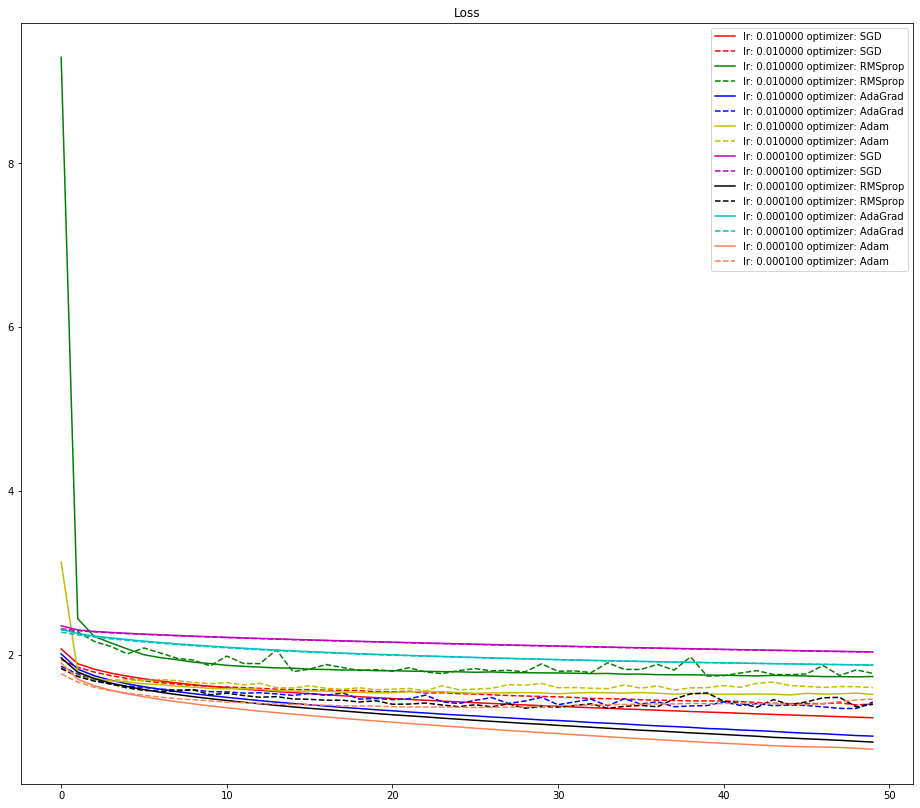

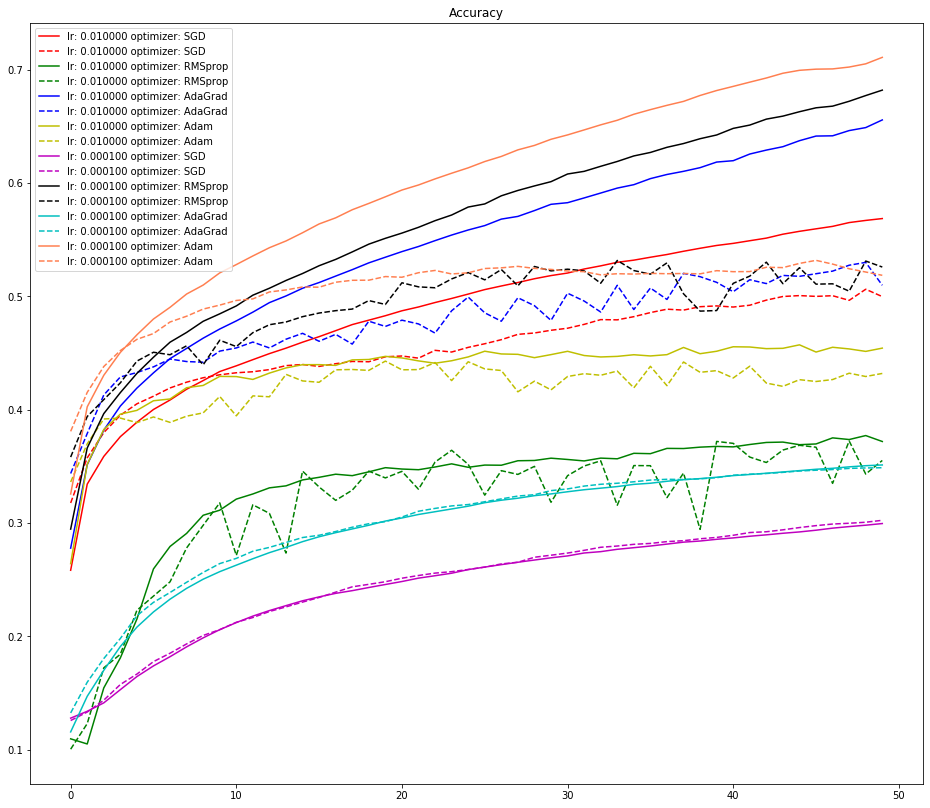

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()